<p style="text-align: center; font-size: 192%"> Computational Finance </p>
<img src="../img/ABSlogo.svg" alt="LOGO" style="display:block; margin-left: auto; margin-right: auto; width: 90%;">
<p style="text-align: center; font-size: 150%"> Week 3: Risk Management; Plotting </p>
<p style="text-align: center; font-size: 75%"> <a href="#copyrightslide">Copyright</a> </p>

# Outline

* Solutions exercise week 2
* Mock exam question
* Quiz on week 3 material
* Impact of sample on VaR

### Mock exam question
1. Write a docstring for the function `f(z)`, that takes the list `z` as input, defined in the cell below. In other words, what does the function do?

In [ ]:
def f(z):
    '''
    
    '''
    
    j = 0
    
    while z[j] <= 0:
        j = j + 1
        
    return j

2. We define three arrays `a`, `b` and `c`. Please do the following:
    * Select the last three elements in `a` without using that you know that `a` is of length 6.
    * Select the elements in `a` corresponding to the elements in `b` that are equal to 0.
    * Compute a matrix `d` where each element `d[i, j] = a[i] + b[j]` without using a `for`-loop.

In [ ]:
import numpy as np
a = np.array([1, 2, 3, 4, 5, 6])
b = np.array([0, -2, 0, -3, 4, 0])
c = np.array([5, 10, -2])

## Questions
* The Value at Risk is expected to be a positive number.
* The nonparametric methods are incorrect if we know that returns follow a parametric distribution.
* VaR is always underestimated when assuming a normal distribution.
* A QQ plot can be used to inspect whether the data is normally distributed.
* If there is only 1 violation in our evaluation sample, it must be a good VaR estimate!

## Impact of sample

* VaR estimate depends on the sample: time period and number of observations.
* Presence of volatility clustering and crises.
* Fewer observations $\rightarrow$ more noise and less accurate estimate.

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
from scipy.stats import gaussian_kde
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import ipywidgets as widgets
from ipywidgets import interactive

In [2]:
def histVaR_hs(r):
    '''Plot histogram of returns, and includes the VaR estimated as the empirical quantile.'''
    
    # Empirical quantile
    VaR_hist = -np.percentile(r,1)
    
    # Histogram and line plot for VaR
    ax = sns.distplot(r, bins=70, kde=False, norm_hist=True)
    
    # Edit figure
    ax.set_xticks([-VaR_hist,0])
    ax.set_xticklabels(['$-VaR_{t+1}^{0.01}$ = -%4.3f' %VaR_hist,0])
    plt.title('Returns')
        
    return ax, VaR_hist

In [3]:
def histVaR_kde(r):
    '''Plot histogram of returns, and includes the VaR estimated using a kernel density estimate.'''
    
    # KDE quantile
    kernel = gaussian_kde(r)  #estimate the kernel density - with 'bw_method=' different bandwidth can be choosen
    kde_sim_r = kernel.resample(10000)  #'resample()' takes the number of desired datapoints as argument
    VaR_kde = -np.percentile(kde_sim_r,1)
    
    # Histogram and line plot for VaR
    ax = sns.distplot(r, bins=70, kde=True, kde_kws={"color": "tab:orange", "label": "Fitted empirical PDF"})
    plt.plot([-VaR_kde, -VaR_kde],[0,kernel.pdf(-VaR_kde)],'k',LineWidth=1)
    
    # Edit figure
    ax.set_xticks([-VaR_kde,0])
    ax.set_xticklabels(['$-VaR_{t+1}^{0.01}$ = -%4.3f' %VaR_kde,0])
    plt.title('Returns and kernel density estimate')
        
    return ax, VaR_kde

In [4]:
def histVaR_norm(r):
    '''This function plots a histogram of the returns, overlaid with a fitted normal density.'''
    
    # Fit normal distribution
    mu, sig = stats.norm.fit(r)
    VaR_norm = - mu - sig*stats.norm.ppf(0.01)
    
    # Histogram and line plot for VaR
    ax = sns.distplot(r, bins=70, kde=False, fit=stats.norm, fit_kws={"color": "tab:orange", "alpha": 0.95, "label": "Fitted Normal PDF"})
    plt.plot([-VaR_norm, -VaR_norm],[0,stats.norm.pdf(-VaR_norm,mu,sig)],'k',LineWidth=1)
    
    # Edit figure
    ax.set_xticks([-VaR_norm,0])
    ax.set_xticklabels(['$-VaR_{t+1}^{0.01}$ = -%4.3f' %VaR_norm,0])
    ax.text(plt.xlim()[0]+.01*(plt.xlim()[1]-plt.xlim()[0]),plt.ylim()[1],'$\mu=%7.6f$\n$\sigma=%7.6f$' %(mu, sig), ha='left', va='top')  #\n means newline.
    #ax.legend(loc='upper right')
    plt.title('Returns and fitted normal PDF')
        
    return ax, VaR_norm

In [5]:
def histVaR_t(r):
    '''This function plots a histogram of the returns, overlaid with a fitted Student's t density.'''
    
    # Fit Student's t distribution
    df, m, h = stats.t.fit(r)  #fit a location-scale t distribution to r
    VaR_t = -stats.t.ppf(0.01, df, loc=m, scale=h) #or -m-h*stats.t.ppf(0.01, df, loc=0, scale=1)
    
    # Histogram and line plot for VaR
    ax = sns.distplot(r, bins=70, kde=False, fit=stats.t, fit_kws={"color": "tab:orange", "alpha": 0.95, "label": "Fitted t PDF"})
    plt.plot([-VaR_t, -VaR_t],[0,stats.t.pdf(-VaR_t,df,m,h)],'k',LineWidth=1)
    
    # Edit figure
    ax.set_xticks([-VaR_t,0])
    ax.set_xticklabels(['$-VaR_{t+1}^{0.01}$ = -%4.3f' %VaR_t,0])
    ax.text(plt.xlim()[0]+.01*(plt.xlim()[1]-plt.xlim()[0]),plt.ylim()[1],'$df=%7.6f$\n$m=%7.6f$\n$h=%7.6f$' %(df, m, h), ha='left', va='top')  #\n means newline.
    #ax.legend(loc='upper right')|
    plt.title('Returns and fitted Student''s $t$ PDF')
        
    return ax, VaR_t

In [6]:
def histVaR(r, df0):
    '''Plots the histogram of returns r and the true PDF (a Student's t with df0 degrees of freedom) four times,
    comparing with the VaR estimate and fitted PDF for four methods: historical simulation, kde, normal and student's t.'''
    
    # True PDF
    x = np.linspace(np.min(r),np.max(r),100)
    y = stats.t.pdf(x, df=df0)
    
    # Histograms
    fig = plt.figure(figsize=(12,12))
    plt.subplot(221)
    ax1, VaR_hist = histVaR_hs(r)
    plt.plot(x,y,'k--',label='True PDF')
    ax1.legend(loc='upper right')
    plt.subplot(222)
    ax2, VaR_kde = histVaR_kde(r)
    plt.plot(x,y,'k--',label='True PDF')
    ax2.legend(loc='upper right')
    plt.subplot(223)
    ax3, VaR_norm = histVaR_norm(r)
    plt.plot(x,y,'k--',label='True PDF')
    ax3.legend(loc='upper right')
    plt.subplot(224)
    ax4, VaR_t = histVaR_t(r)
    plt.plot(x,y,'k--',label='True PDF')
    ax4.legend(loc='upper right')
    
    # Store in list
    meth = ['Historical', 'KDE', 'Normal', 'Student\'s t']
    VaRlist = [VaR_hist, VaR_kde, VaR_norm, VaR_t]
        
    # Print table
    print('%12s %6s %6s' % ('Method','VaR','Quantile in true PDF'))
    for i in range(len(VaRlist)):
        print('%12s %6.3f %6.3f' % (meth[i],VaRlist[i],stats.t.cdf(-VaRlist[i],df=df0)))
    
    return fig

### Time variation
* Consider the impact of different time periods.
* Volatility varies over time.

In [23]:
p = web.DataReader('DJIA', 'yahoo', start='1/1/2007', end='30/09/2020')['Adj Close']  #S&P500 from St. Louis Fed (pulls Adj. Close)
p = p.dropna() # Drop missing values, FRED reports all days, including non-trading days such as holidays
r = 100*(np.log(p) - np.log(p).shift(1))
r.name = 'Return'
r = r[1:]  #Remove the first observation (NaN).

Sample: 2007-2009  VaR: 4.001
Sample: 2010-2012  VaR: 2.458
Sample: 2013-2015  VaR: 1.817
Sample: 2016-2018  VaR: 1.939


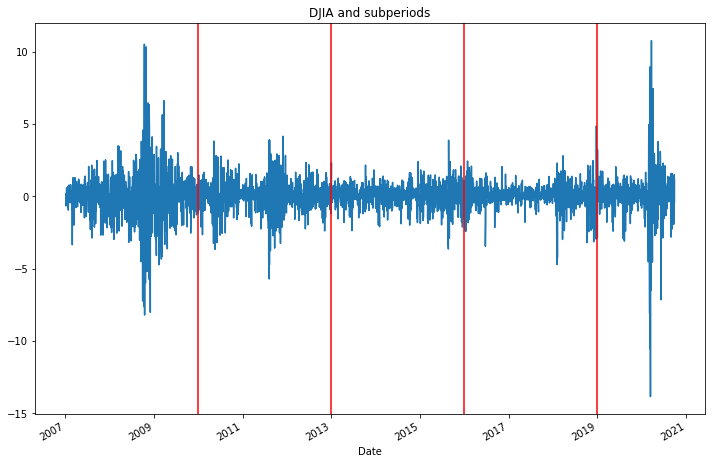

In [27]:
plt.figure(figsize=(12,8))
wsize = 2  # in years
ax1 = r.plot()
for endyr in range(2009,2020,3):
    sig_hist = r[str(endyr-wsize):str(endyr)].std()
    VaR_hist = -sig_hist * stats.norm.ppf(0.01)  # Assuming normality and mu=0
    print('Sample: %4i-%4i  VaR: %4.3f'  % ((endyr-wsize), endyr, VaR_hist))
    ax1.axvline(pd.datetime(endyr,12,31), Color='r')
    plt.title('DJIA and subperiods')

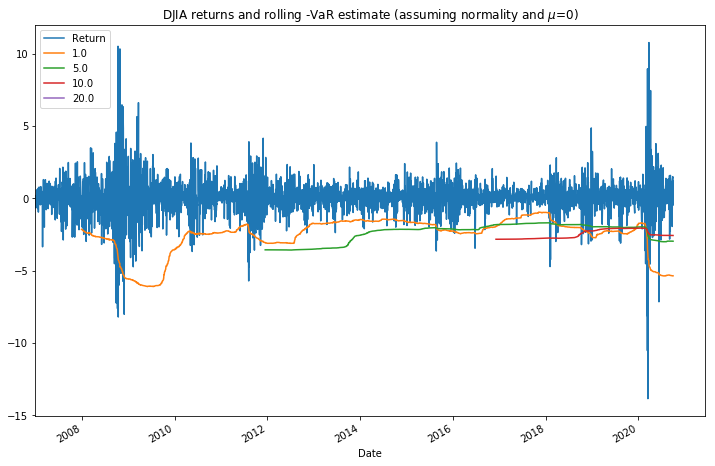

In [25]:
plt.figure(figsize=(12,8))
r.plot()
for wsize in [250,1250,2500,5000]:
    sig_hist = r.rolling(window=wsize).std()
    minVaR_hist = sig_hist * stats.norm.ppf(0.01)  # Assuming normality and mu=0
    minVaR_hist.plot(label=str(wsize/250))
plt.legend();
plt.title(r'DJIA returns and rolling -VaR estimate (assuming normality and $\mu$=0)')
plt.xlim(pd.datetime(2007,1,1));

### Number of observations

* Now simulate data: consider up to 10,000 observations, approx. 40 years of daily data.
* True distribution: Student's $t$ with 5 degrees of freedom.

In [17]:
N0 = 10000
df0 = 5
r = np.random.standard_t(df = df0, size=N0)
VaR0 = stats.t.ppf(0.01, df=df0)
print('True VaR: %4.3f' %-VaR0)

True VaR: 2.330


In [18]:
f = lambda N: histVaR(r[:N], df0)

interactive_plot = interactive(f, N=[25,100,250,500,750,1000,2500,5000,10000])
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(Dropdown(description='N', options=(25, 100, 250, 500, 750, 1000, 2500, 5000, 10000), val…

* Let's have a closer look at the VaR estimates.
* Plot the VaR against the number of observations $N$.
* Is there convergence? Bias?

In [21]:
N0 = 5000   # N=5,000 is roughly 20 years of daily observations
df0 = 5
p = 0.01

r = np.random.standard_t(df = df0, size=N0)
N = [5,25,50,100,250,500,750,1000,2500,5000]
K = len(N)

VaR0 = -stats.t.ppf(p, df=df0)

VaRs = pd.DataFrame(np.zeros([K,4]), columns=['Historical', 'KDE', 'Normal', 'Student\'s t'], index=N)

# Compute VaR for different N
for i in range(K):    
    # Empirical quantile
    VaRs['Historical'].iloc[i] = -np.percentile(r[:N[i]],100*p)
    
    # KDE quantile
    kernel = gaussian_kde(r[:N[i]])
    kde_sim_r = kernel.resample(10000)
    VaRs['KDE'].iloc[i] = -np.percentile(kde_sim_r,100*p)
    
    # Fit normal distribution
    mu, sig = stats.norm.fit(r[:N[i]])
    VaRs['Normal'].iloc[i] = - mu - sig*stats.norm.ppf(p)
    
    # Fit Student's t distribution
    df, m, h = stats.t.fit(r[:N[i]])
    VaRs['Student\'s t'].iloc[i] = -stats.t.ppf(p, df, loc=m, scale=h)

VaRs

,Historical,KDE,Normal,Student's t
5,0.291569,1.092242,0.997402,0.997467
25,1.026281,1.569793,1.638227,1.638149
50,2.042831,2.413773,2.408731,2.862744
100,2.334416,2.676268,2.681590,2.741507
250,2.652336,2.868853,2.789152,3.048468
500,3.034892,3.320547,2.983371,3.370104
750,2.972995,3.113357,2.893766,3.297799
1000,3.082605,3.220375,2.929350,3.387650
2500,3.230576,3.599376,3.076942,3.477665
5000,3.363545,3.249875,3.007681,3.374309


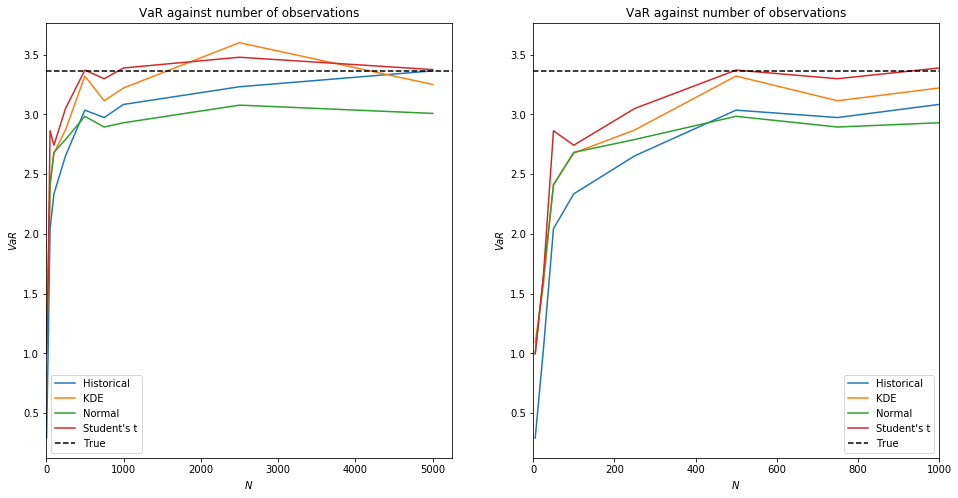

In [22]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(VaRs)
plt.axhline(-stats.t.ppf(p,df=df0),Color='k',LineStyle='--')
plt.legend(np.append(VaRs.columns.values,'True'), loc='best')
plt.xlabel('$N$')
plt.ylabel('$VaR$')
plt.xlim(0)
plt.title('VaR against number of observations');
plt.subplot(122)
plt.plot(VaRs)
plt.axhline(-stats.t.ppf(p,df=df0),Color='k',LineStyle='--')
plt.legend(np.append(VaRs.columns.values,'True'), loc='best')
plt.xlabel('$N$')
plt.ylabel('$VaR$')
plt.xlim([0,1000])
plt.title('VaR against number of observations');

* The above was just one sample of returns.
* Now, simulate $M$ times to get the distribution of the VaR estimates for a given method and number of observations $N$.
* Compute the **mean squared error** to get a sense of the variance of our estimator.
* Here, we assume that the returns follow a Student's $t$ distribution with 5 degrees of freedom.

In [8]:
M = 250
N0 = 2500
df0 = 5
N = [25,50,100,250,500,750,1000,2500]  # Max is N0
K = len(N)
p = 0.01

VaR0 = -stats.t.ppf(p, df=df0)

VaR_p1 = pd.DataFrame(np.zeros([K,4]), columns=['Historical', 'KDE', 'Normal', 'Student\'s t'], index=N)

for m in range(M):
    r = np.random.standard_t(df = df0, size=N0)

    for i in range(K):    
        # Empirical quantile
        VaR_p1['Historical'].iloc[i] += (-np.percentile(r[:N[i]],100*p) - VaR0)**2 / M

        # KDE quantile
        kernel = gaussian_kde(r[:N[i]])
        kde_sim_r = kernel.resample(10000)
        VaR_p1['KDE'].iloc[i] += (-np.percentile(kde_sim_r,100*p) - VaR0)**2 / M

        # Fit normal distribution
        mu, sig = stats.norm.fit(r[:N[i]])
        VaR_p1['Normal'].iloc[i] += (- mu - sig*stats.norm.ppf(p) - VaR0)**2 / M

        # Fit Student's t distribution
        df, m, h = stats.t.fit(r[:N[i]])
        VaR_p1['Student\'s t'].iloc[i] += (-stats.t.ppf(p, df, loc=m, scale=h) - VaR0)**2 / M  
        
VaR_p1

,Historical,KDE,Normal,Student's t
25,1.563315,1.212696,0.633276,1.885156
50,0.922838,1.148137,0.401829,0.474125
100,0.595220,0.651489,0.283866,0.237590
250,0.261965,0.278688,0.196620,0.099616
500,0.160318,0.150005,0.162835,0.051352
750,0.109974,0.108074,0.150100,0.037197
1000,0.095328,0.099167,0.141872,0.028396
2500,0.035572,0.043666,0.133132,0.011462


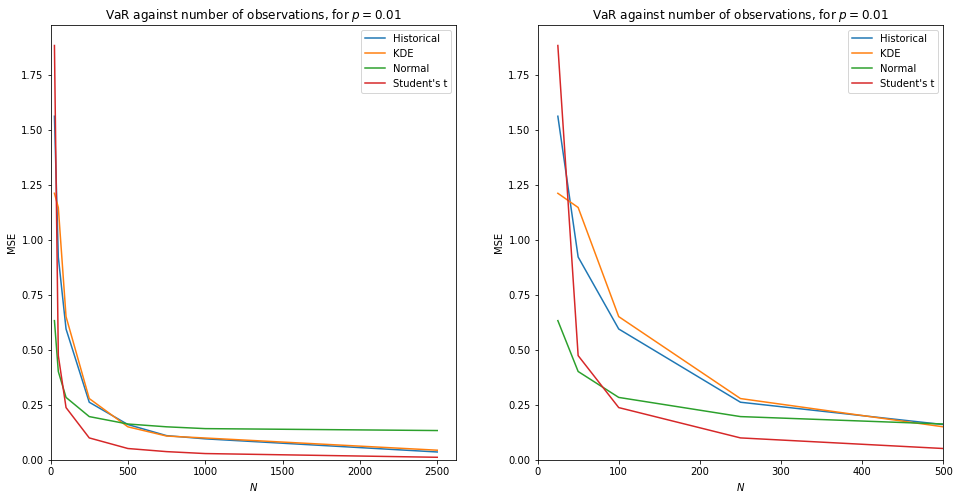

In [9]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(VaR_p1)
plt.legend(VaR_p1.columns)
plt.xlabel('$N$')
plt.ylabel('MSE')
plt.xlim(0)
plt.ylim(0)
plt.title('VaR against number of observations, for $p=%4.2f$' % p);
plt.subplot(122)
plt.plot(VaR_p1)
plt.legend(VaR_p1.columns)
plt.xlabel('$N$')
plt.ylabel('MSE')
plt.xlim([0,500])
plt.ylim(0)
plt.title('VaR against number of observations, for $p=%4.2f$' % p);

* To compare, let's do the same thing but for $p = 0.20$.
* It is more difficult to estimate more extreme quantiles accurately. 

In [10]:
M = 250
N0 = 2500
df0 = 5
N = [5,25,50,100,250,500,750,1000,2500]  # Max is N0
K = len(N)
p = 0.2

VaR0 = -stats.t.ppf(p, df=df0)

VaR_p2 = pd.DataFrame(np.zeros([K,4]), columns=['Historical', 'KDE', 'Normal', 'Student\'s t'], index=N)

for m in range(M):
    r = np.random.standard_t(df = df0, size=N0)

    for i in range(K):    
        # Empirical quantile
        VaR_p2['Historical'].iloc[i] += (-np.percentile(r[:N[i]],100*p) - VaR0)**2 / M

        # KDE quantile
        kernel = gaussian_kde(r[:N[i]])
        kde_sim_r = kernel.resample(10000)
        VaR_p2['KDE'].iloc[i] += (-np.percentile(kde_sim_r,100*p) - VaR0)**2 / M

        # Fit normal distribution
        mu, sig = stats.norm.fit(r[:N[i]])
        VaR_p2['Normal'].iloc[i] += (- mu - sig*stats.norm.ppf(p) - VaR0)**2 / M

        # Fit Student's t distribution
        df, m, h = stats.t.fit(r[:N[i]])
        VaR_p2['Student\'s t'].iloc[i] += (-stats.t.ppf(p, df, loc=m, scale=h) - VaR0)**2 / M
        
VaR_p2        

,Historical,KDE,Normal,Student's t
5,0.513587,0.738217,0.586166,0.521591
25,0.129831,0.154295,0.162827,0.097457
50,0.057673,0.072831,0.082242,0.039700
100,0.031259,0.041614,0.072703,0.023082
250,0.010871,0.016971,0.046520,0.008999
500,0.004980,0.009271,0.037522,0.003646
750,0.003817,0.006423,0.033123,0.002574
1000,0.002654,0.004790,0.032546,0.001799
2500,0.000965,0.002137,0.029103,0.000733


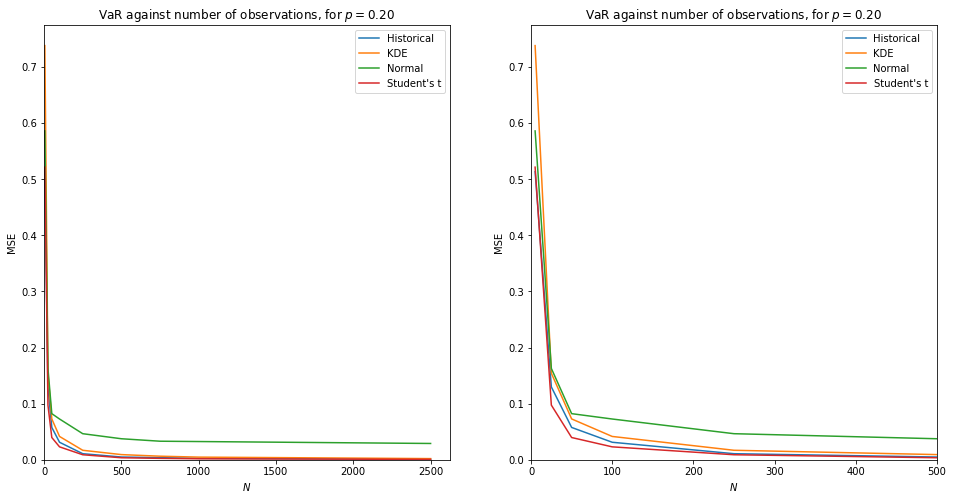

In [11]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(VaR_p2)
plt.legend(VaR_p2.columns)
plt.xlabel('$N$')
plt.ylabel('MSE')
plt.xlim(0)
plt.ylim(0)
plt.title('VaR against number of observations, for $p=%4.2f$' % p);
plt.subplot(122)
plt.plot(VaR_p2)
plt.legend(VaR_p2.columns)
plt.xlabel('$N$')
plt.ylabel('MSE')
plt.xlim([0,500])
plt.ylim(0)
plt.title('VaR against number of observations, for $p=%4.2f$' % p);